In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("NatGas") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,TRNLTTFD1,TFMBMc3,TFMBMc6,TFMBMc9,TFMBMc12,EUR=,EUR3MV=,EUR6MV=,EUR9MV=,EUR1YV=,TRNLTTFD1 USD,TFMBMc3 USD,TFMBMc6 USD,TFMBMc9 USD,TFMBMc12 USD
Timestamp,,,,,,,,,,,,,,,
1988-06-30,NaN,NaN,NaN,NaN,NaN,1.1429,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-07-31,NaN,NaN,NaN,NaN,NaN,1.1091,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-08-31,NaN,NaN,NaN,NaN,NaN,1.1053,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-09-30,NaN,NaN,NaN,NaN,NaN,1.1093,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1988-10-31,NaN,NaN,NaN,NaN,NaN,1.1596,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Timestamp'>

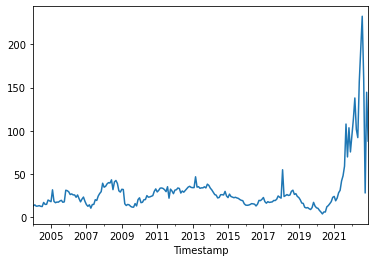

In [3]:
spot = df1["TRNLTTFD1 USD"]

spot = spot[spot != 0]

#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count    228.000000
mean      30.378677
std       29.085330
min        3.884300
25%       17.188167
50%       23.481350
75%       31.878270
max      232.618410
Name: TRNLTTFD1 USD, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 3.9621236372698827
Skewness logs: 0.8946250894132632
Kurtosis spot: 21.430200135112305
Kurtosis logs: 5.466537594469755
JB spot: Jarque_beraResult(statistic=3823.426732939272, pvalue=0.0)
JB logs: Jarque_beraResult(statistic=88.20962711995237, pvalue=0.0)
Q(6) spot:       lb_stat      lb_pvalue
6  660.269687  2.308038e-139
Q(6) logs:       lb_stat      lb_pvalue
6  796.153695  1.043536e-168


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-4.005594487273092, 0.0013814985278439538, 15, 212, {'1%': -3.4615775784078466, '5%': -2.875271898983725, '10%': -2.5740891037735847}, 1644.1471584379246)
ADF logs: (-4.39529457899771, 0.00030257626237088157, 12, 215, {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}, 6.509543540043467)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.537
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.327
P-value                         0.014
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The pr

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.440
P-value                         0.057
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.194
P-value                         0.280
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


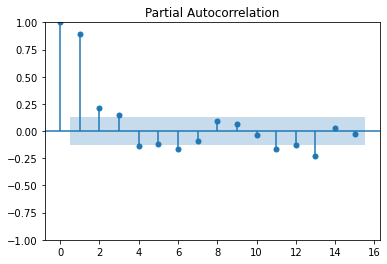

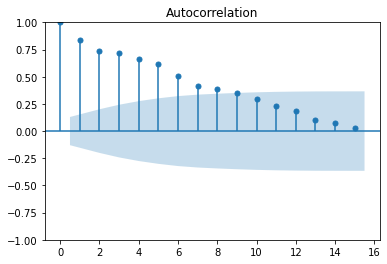

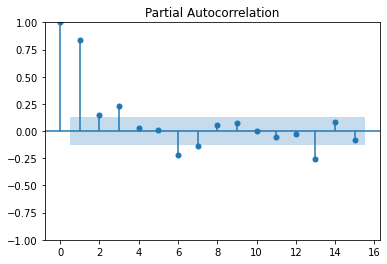

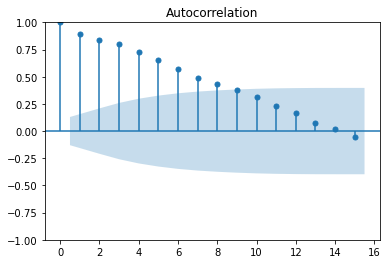

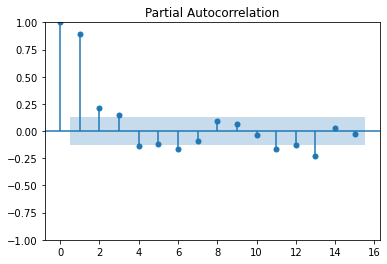

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

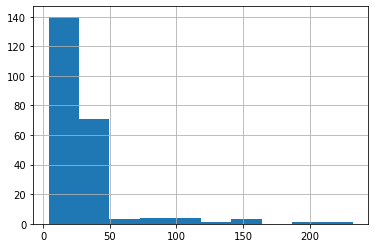

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

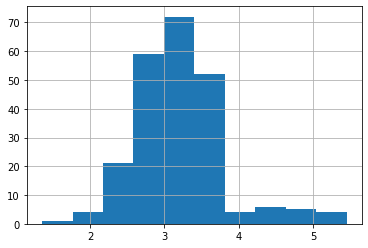

In [10]:
np.log(spot).hist()

In [11]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=152)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=865.578, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1427.703, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=873.361, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1261.215, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=864.683, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1192.206, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=862.626, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.271, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=860.151, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=984.162, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=865.975, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=861.573, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=861.855, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1083.6

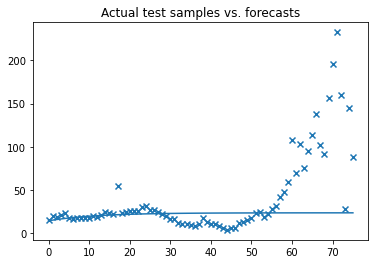

In [12]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -425.968
Date:                Tue, 27 Dec 2022   AIC                            859.937
Time:                        19:52:14   BIC                            872.032
Sample:                             0   HQIC                           864.850
                                - 152                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3832      1.132      2.105      0.035       0.164       4.602
ar.L1          0.6747      0.062     10.910      0.000       0.553       0.796
ar.L2          0.2247      0.063      3.569      0.000       0.101       0.348
sigma2        15.7591      1.232     12.794      0.000      13.345      18.173
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                52.75
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

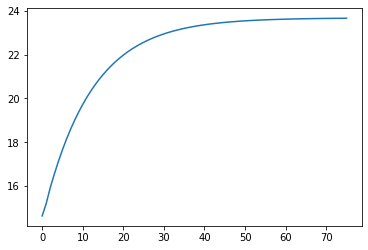

In [14]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [15]:
arima.predict(n_periods=test.shape[0])

array([14.62734119, 15.19673921, 15.9221798 , 16.53953257, 17.11902247,
       17.64868317, 18.13621943, 18.58414076, 18.99587128, 19.37428494,
       19.72208996, 20.04175918, 20.33556939, 20.60561222, 20.85381035,
       21.08193086, 21.2915979 , 21.48430424, 21.66142188, 21.82421186,
       21.97383318, 22.11135111, 22.23774473, 22.35391393, 22.46068579,
       22.5588205 , 22.64901675, 22.73191671, 22.8081106 , 22.8781409 ,
       22.9425062 , 23.00166477, 23.05603779, 23.10601239, 23.15194437,
       23.19416074, 23.23296209, 23.26862466, 23.30140236, 23.33152856,
       23.35921774, 23.38466705, 23.40805767, 23.42955614, 23.44931553,
       23.46747651, 23.48416839, 23.49951   , 23.51361057, 23.5265705 ,
       23.53848205, 23.54943004, 23.55949241, 23.56874079, 23.57724104,
       23.58505368, 23.59223433, 23.5988341 , 23.6049    , 23.61047521,
       23.61559942, 23.62030911, 23.62463782, 23.62861636, 23.63227307,
       23.63563397, 23.638723  , 23.64156214, 23.64417162, 23.64

<AxesSubplot:xlabel='Timestamp'>

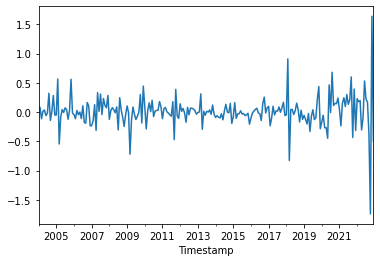

In [16]:
spot2 = np.log(spot).diff()
spot2.plot()

In [17]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    227.000000
mean       0.008341
std        0.262590
min       -1.740129
25%       -0.086982
50%        0.000516
75%        0.096463
max        1.637796
Name: TRNLTTFD1 USD, dtype: float64

In [18]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.15263675588754955
Kurtosis spot: 17.867222768775026
JB spot: Jarque_beraResult(statistic=2091.497649314829, pvalue=0.0)
Q(6) spot:      lb_stat  lb_pvalue
6  24.072879   0.000506


In [19]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-20.656567466316254, 0.0, 0, 226, {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}, 19.699733904280038)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                -20.566
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.072
P-value                         0.738
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


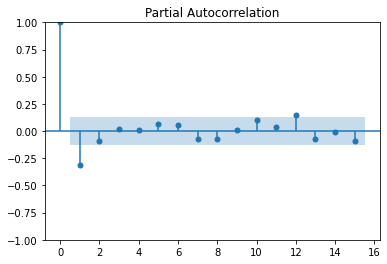

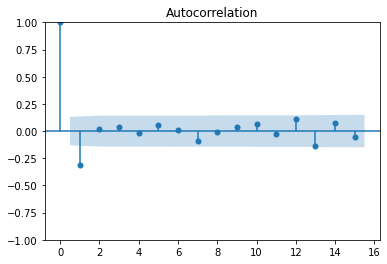

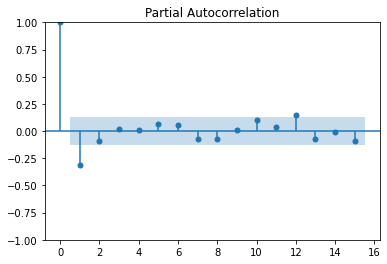

In [21]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

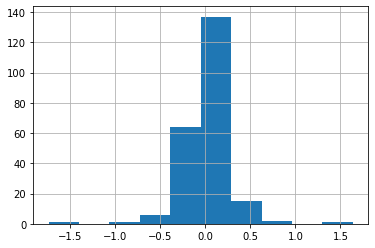

In [22]:
spot2.hist()


In [23]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=152)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-110.654, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-107.466, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-113.510, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-114.245, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-112.267, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-112.314, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-110.461, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-112.249, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.167 seconds


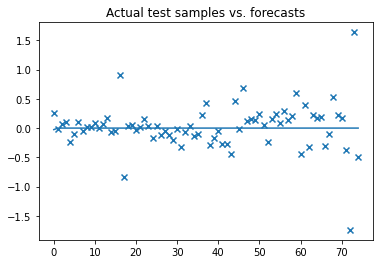

In [24]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [25]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  59.123
Date:                Tue, 27 Dec 2022   AIC                           -114.245
Time:                        19:52:31   BIC                           -108.198
Sample:                             0   HQIC                          -111.788
                                - 152                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2385      0.064     -3.700      0.000      -0.365      -0.112
sigma2         0.0269      0.002     13.986      0.000       0.023       0.031
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                67.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

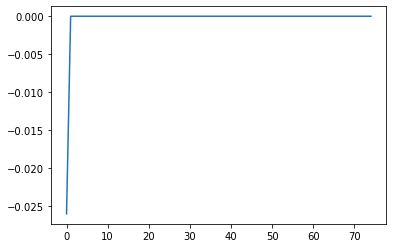

In [26]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [27]:
arima2.predict(n_periods=test2.shape[0])

array([-0.02597507,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))